In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv("dataset.csv")

features = data.drop(columns=[data.columns[-2]]).select_dtypes(include=[np.number]).values
labels = data.iloc[:, -2].values

unique_classes = np.unique(labels)
labels_series = pd.Series(labels)

class_1 = features[labels_series == unique_classes[0]]
class_2 = features[labels_series == unique_classes[1]]

centroid_1 = np.mean(class_1, axis=0)
centroid_2 = np.mean(class_2, axis=0)

spread_1 = np.std(class_1, axis=0)
spread_2 = np.std(class_2, axis=0)

interclass_distance = np.linalg.norm(centroid_1 - centroid_2)

print(f"Interclass Distance: {interclass_distance}")
print(f"Centroid of Class 1: {centroid_1}")
print(f"Centroid of Class 2: {centroid_2}")
print(f"Spread of Class 1: {spread_1}")
print(f"Spread of Class 2: {spread_2}")



Interclass Distance: 673116.9587643914
Centroid of Class 1: [ 2.00200000e+03  5.25653230e+03  4.39844830e+03  6.19190350e+03
  1.01998400e+03  5.11917382e+04  7.71000000e+02  1.39057513e+04
 -7.97183079e+05  0.00000000e+00  3.30239753e+04  7.14644570e+03
  9.44550480e+03  1.12223960e+04  3.00024135e+04  2.57117318e+04
  2.48273495e+04  1.36980783e+05  7.71615450e+03  4.60095510e+03
  1.44233043e+04  0.00000000e+00  0.00000000e+00  1.74626516e+04
  3.87072170e+07  1.06487665e+08  6.78472090e+07  7.77429270e+07
  1.31833333e+00]
Centroid of Class 2: [ 2.00100000e+03  4.15422340e+03  3.26106440e+03  6.09476510e+03
  1.11563200e+03  5.12012611e+04  7.31000000e+02  1.38148964e+04
 -7.97183079e+05  0.00000000e+00  3.53737190e+04  7.08022070e+03
  1.03505555e+04  1.08775433e+04  2.97197477e+04  2.47101319e+04
  2.45878214e+04  1.36408994e+05  7.70823310e+03  4.58992940e+03
  1.44714001e+04  0.00000000e+00  0.00000000e+00  2.33018189e+04
  3.88661250e+07  1.06948739e+08  6.82287880e+07  7.8006

Text(0, 0.5, 'Frequency')

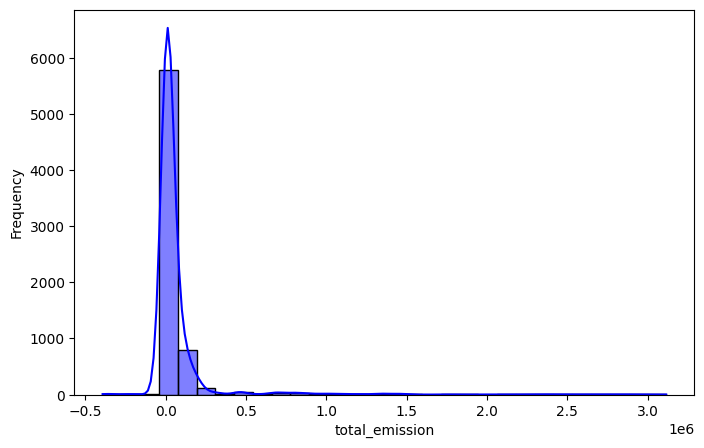

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
import pandas as pd
df = pd.read_csv("dataset.csv")

# Select a numerical feature
feature = "total_emission"

# Drop missing values to avoid issues
data = df[feature].dropna()

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, kde=True, color="blue")  # kde=True adds a smooth density curve
plt.xlabel(feature)
plt.ylabel("Frequency")





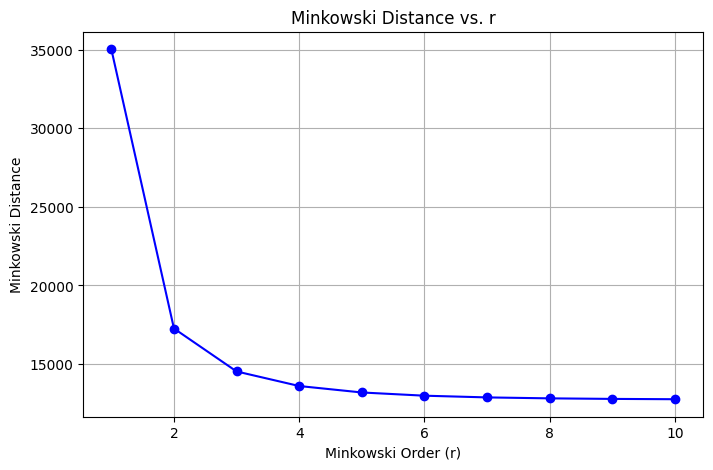

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("dataset.csv")

features = data.select_dtypes(include=[np.number]).dropna().values

if len(features) < 2:
    raise ValueError("Not enough numerical data points to compute Minkowski distance.")

vector_1 = features[0]
vector_2 = features[1]

r_values = np.arange(1, 11)
distances = [np.linalg.norm(vector_1 - vector_2, ord=r) for r in r_values]

plt.figure(figsize=(8, 5))
plt.plot(r_values, distances, marker='o', linestyle='-', color='b')
plt.xlabel("Minkowski Order (r)")
plt.ylabel("Minkowski Distance")
plt.title("Minkowski Distance vs. r")
plt.grid(True)
plt.show()


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# Select two classes (e.g., Afghanistan and Algeria)
selected_classes = ["Afghanistan", "Algeria"]
df_selected = df[df["Area"].isin(selected_classes)]

# Prepare features (X) and labels (y)
X = df_selected.drop(columns=["Area", "Year"])  # Remove non-numeric columns
y = df_selected["Area"]  # Target labels (classification based on country)

# Split into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print dataset sizes
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (43, 29)
Testing Set Size: (19, 29)


In [19]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# Select two classes (e.g., Afghanistan and Algeria)
selected_classes = ["Afghanistan", "Algeria"]
df_selected = df[df["Area"].isin(selected_classes)]

# Prepare features (X) and labels (y)
X = df_selected.drop(columns=["Area", "Year"]).fillna(0)  # Remove non-numeric columns & handle NaNs
y = df_selected["Area"]  # Target labels (classification based on country)

# Split into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (Important for kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Evaluate model
accuracy = knn.score(X_test_scaled, y_test)
print(f"kNN Model Accuracy: {accuracy * 100:.2f}%")


kNN Model Accuracy: 100.00%


In [20]:
accuracy = knn.score(X_test_scaled, y_test)

# Print the accuracy
print(f"Accuracy of kNN model on the test set: {accuracy * 100:.2f}%")


Accuracy of kNN model on the test set: 100.00%


In [21]:
# Predict the classes for the test set using the trained kNN model
predictions = knn.predict(X_test_scaled)

# Print the predictions for the test set
print(f"Predicted classes for the test set: {predictions}")

# Perform classification for a single test vector
test_vect = X_test_scaled[0]  # Using the first vector from the test set as an example
predicted_class = knn.predict([test_vect])

print(f"Predicted class for the first test vector: {predicted_class[0]}")


Predicted classes for the test set: ['Algeria' 'Algeria' 'Afghanistan' 'Algeria' 'Afghanistan' 'Algeria'
 'Afghanistan' 'Afghanistan' 'Afghanistan' 'Algeria' 'Afghanistan'
 'Afghanistan' 'Algeria' 'Afghanistan' 'Algeria' 'Algeria' 'Afghanistan'
 'Afghanistan' 'Algeria']
Predicted class for the first test vector: Algeria


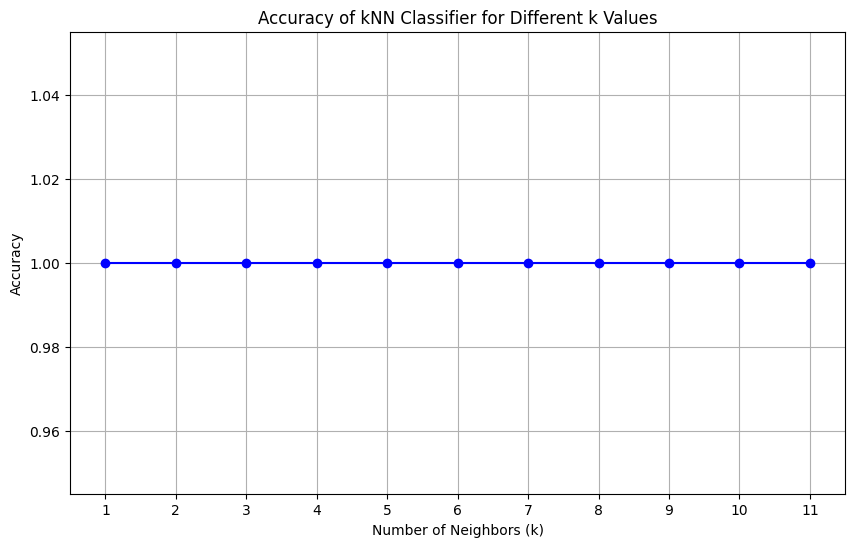

In [24]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# Select two classes (e.g., Afghanistan and Algeria)
selected_classes = ["Afghanistan", "Algeria"]
df_selected = df[df["Area"].isin(selected_classes)]

# Prepare features (X) and labels (y)
X = df_selected.drop(columns=["Area", "Year"]).fillna(0)  # Remove non-numeric columns & handle NaNs
y = df_selected["Area"]  # Target labels (classification based on country)

# Split into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (Important for kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List to store accuracy for each k value
accuracies = []
# Train and evaluate kNN models for k from 1 to 11
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.score(X_test_scaled, y_test)
    accuracies.append(accuracy)

# Plot the accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracies, marker='o', color='b', linestyle='-', markersize=6)
plt.title("Accuracy of kNN Classifier for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()


Confusion Matrix (Training Set):
[[21  0]
 [ 0 22]]

Confusion Matrix (Test Set):
[[10  0]
 [ 0  9]]

Training Set Metrics:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Test Set Metrics:
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


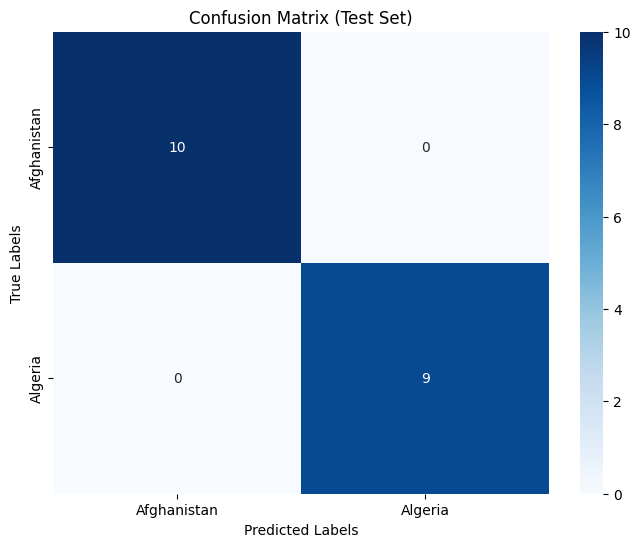

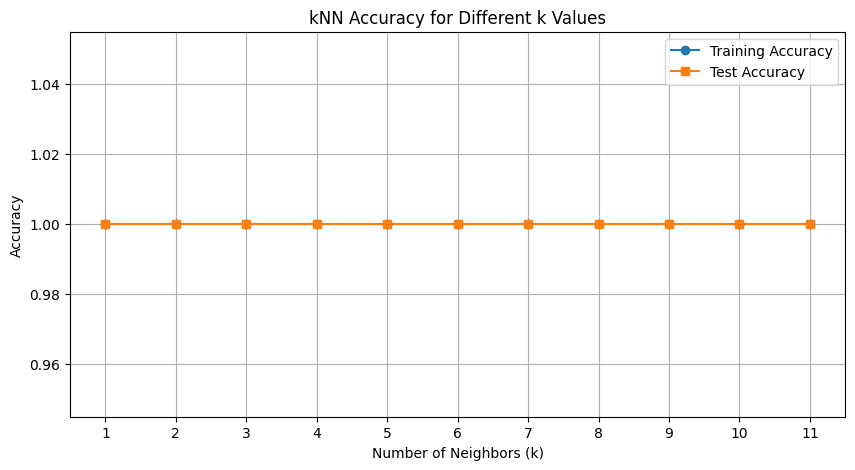

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Load dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# Select two classes (e.g., Afghanistan and Algeria)
selected_classes = ["Afghanistan", "Algeria"]
df_selected = df[df["Area"].isin(selected_classes)]

# Prepare features (X) and labels (y)
X = df_selected.drop(columns=["Area", "Year"]).fillna(0)  # Remove non-numeric columns & handle NaNs
y = df_selected["Area"]  # Target labels (classification based on country)

# Split into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (Important for kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict on both training and test data
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Compute confusion matrix for training and test data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print confusion matrices
print("Confusion Matrix (Training Set):")
print(conf_matrix_train)

print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test)

# Calculate precision, recall, and F1-score for both training and test data
precision_train = precision_score(y_train, y_train_pred, average='macro')  # Changed from 'binary' to 'macro'
recall_train = recall_score(y_train, y_train_pred, average='macro')
f1_train = f1_score(y_train, y_train_pred, average='macro')

precision_test = precision_score(y_test, y_test_pred, average='macro')  # Changed from 'binary' to 'macro'
recall_test = recall_score(y_test, y_test_pred, average='macro')
f1_test = f1_score(y_test, y_test_pred, average='macro')

# Print precision, recall, and F1-score for training and test data
print("\nTraining Set Metrics:")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1-Score: {f1_train:.2f}")

print("\nTest Set Metrics:")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1-Score: {f1_test:.2f}")

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=selected_classes, yticklabels=selected_classes)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ----------------------- Accuracy Plot for Different k Values ------------------------

k_values = range(1, 12)  # k from 1 to 11
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_accuracy = accuracy_score(y_train, knn.predict(X_train_scaled))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the accuracy vs k values
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_accuracies, label="Training Accuracy", marker="o")
plt.plot(k_values, test_accuracies, label="Test Accuracy", marker="s")
plt.xticks(k_values)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("kNN Accuracy for Different k Values")
plt.legend()
plt.grid()
plt.show()
